<a href="https://colab.research.google.com/github/Laxmi-Prajapati/Synapse_LP/blob/Week_2/SynapseWeekTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

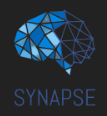

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work :P

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
!pip install shap -q  #Will be used later on

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [ ]:
df_crab = pd.read_csv('/content/drive/MyDrive/Synapse/train.csv')


In [ ]:
df_crab.shape

(74051, 10)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [ ]:
# Your code starts here
def crab_processing(df):
  #logic for feature engineering
  df.drop('id', axis = 1, inplace =True)
  mask = df['Height'] == 0
  df.drop(df[mask].index, inplace = True)
  df['Lost Weight'] = df['Weight']-(df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])
  df['Lost Weight'] = np.where(df['Lost Weight'] <= 0, 0,1)
  df = pd.get_dummies(df, columns = ['Sex'])
  return df

df_crab = crab_processing(df_crab)
df_crab.head()
# Your code ends here

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1,0,1,0


If all is correct, this should be the shape of your df now.

In [ ]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

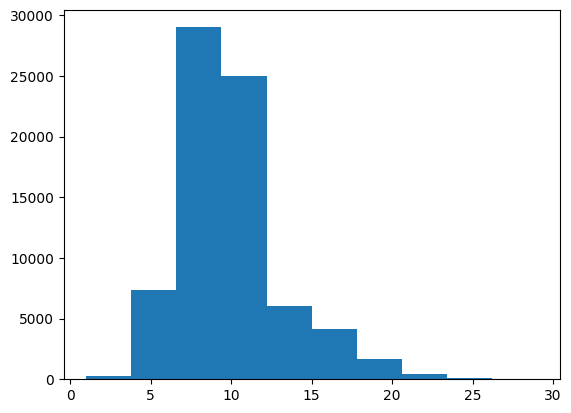

In [ ]:
# Your code starts here
plt.hist(df_crab.Age)
plt.show()
# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [ ]:
# Your code starts here
X = df_crab.drop('Age', axis = 1)
y = pd.DataFrame(df_crab['Age'])
# Your code ends here

In [ ]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
print(X.shape,y.shape)

(74027, 11) (74027, 1)


In [ ]:
#Print a few records of X
X.head(5)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0,1,0


In [ ]:
#Print a few records of y
y.head(5)

,Age
0,9
1,8
2,9
3,11
4,8


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
# Your code starts here
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Your code ends here

(51818, 11) (22209, 11) (51818, 1) (22209, 1)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [ ]:
# Add your import statement here
from sklearn.svm import SVR
# Create an SVR object 'svr' by calling SVR()
svr = SVR(kernel = 'rbf')

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [ ]:
# Your code starts here
y_train = np.ravel(y_train)
svr.fit(X_train, y_train)
# Your code ends here

SVR()

###Prediction, error estimate, and regression evaluation matrices

---



**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22209,) if everything is correct.

In [ ]:
# Your code starts here
predictions = svr.predict(X_test)
predictions.shape
# Your code ends here

(22209,)

Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

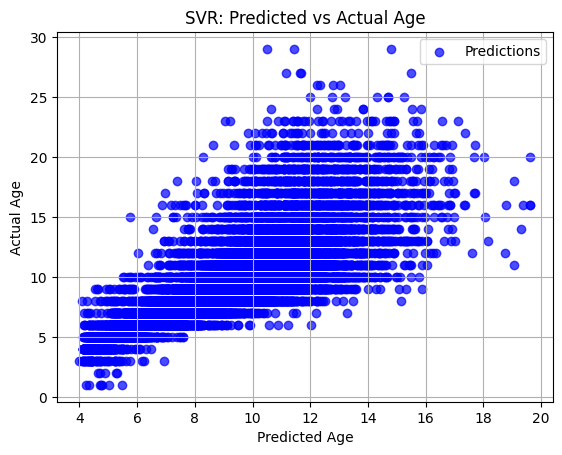

In [ ]:
# Your code starts here
plt.scatter(predictions, y_test, color='blue', marker='o', alpha=0.7, label='Predictions')

plt.xlabel("Predicted Age")
plt.ylabel("Actual Age")
plt.title("SVR: Predicted vs Actual Age")
plt.legend()
plt.grid(True)
plt.show()
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [ ]:
# Your code starts here
from sklearn import metrics
print(f"R2 Score = {metrics.r2_score(y_test,predictions)}")
# Your code ends here

R2 Score = 0.5505329718014413


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

Your text here
R2 (R squared) score is a statistical measure which is used in regression analysis to test how good the fit of a model is. It's values lie between 0 and 1 with 0 being the worst (0% accuracy) and 1 being the best (100% accuracy). A higher R2 score means a better fit.The sum of the square of differences between the predicted values and the target values is calculated. R2 score is measured by subtracting the ratio of the measured sum and the sum of the squared differences between the actual target values and the mean of the target values from 1. The above R2 score means the prediction accuracy of the model is approximately 55% which is not much good, but it can be made better.



In [ ]:
#Explore additional metrics here
print(f"Mean Absolute Error = {metrics.mean_absolute_error(y_test, predictions)}")
print(f"Mean Squared Error = {metrics.mean_squared_error(y_test, predictions)}")
print(f"Root Mean Squared Error = {np.sqrt(metrics.mean_squared_error(y_test, predictions))}")

Mean Absolute Error = 1.3882824656961
Mean Squared Error = 4.4173806768081505
Root Mean Squared Error = 2.10175656935054


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

Your text here

Linear Regression: Linear regression model relates the dependent variables (target) with the independent variables (features) by fitting a linear equation. It aims to find the best fit line that minimizes the sum of squared differences between the observed and predicted values. Linear regression works best where the relatiopnship between the variables is approximately linear.

Decision Tree Regression: Decision tree regression models the relationship between the target variable and the features by recursively partitioning the data into subsets based on the most significant feature. The predicted value is the average of the target values in the leaf node reached by a new data point.Decision tree regression is effective when the relationship between features and the target is non-linear and can be segmented into distinct regions.

Random Forest Regression: Randon forest regression ensemble learning method that combines multiple decision trees to make more accurate predictions. It constructs multiple decision trees using random subsets of the data and features and averages the predictions from these trees. Random forest regression is versatile and performs well in various scenarios. It is particularly useful for tasks where there are many features, potential interactions between features, and noisy data.

###OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


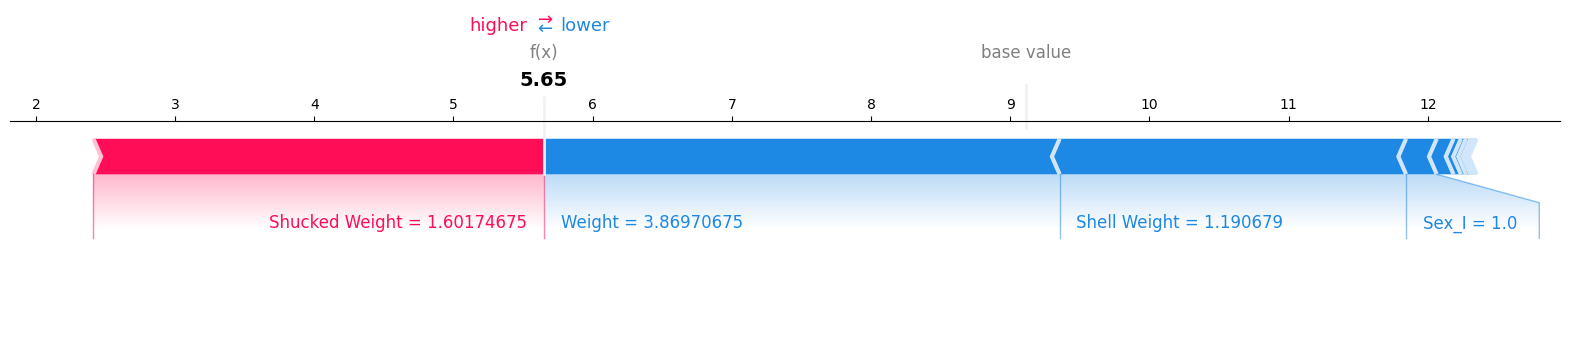

In [ ]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Synapse/classified_data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
#describe()
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

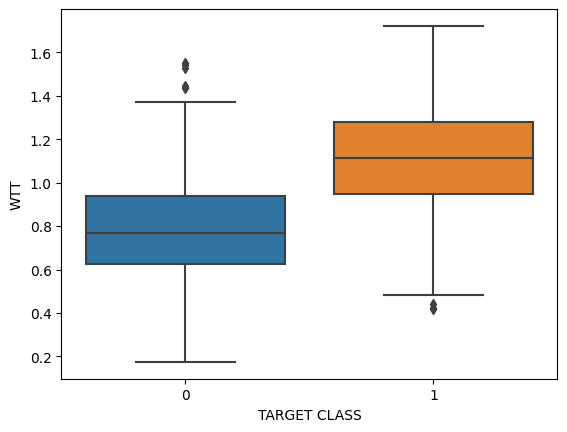

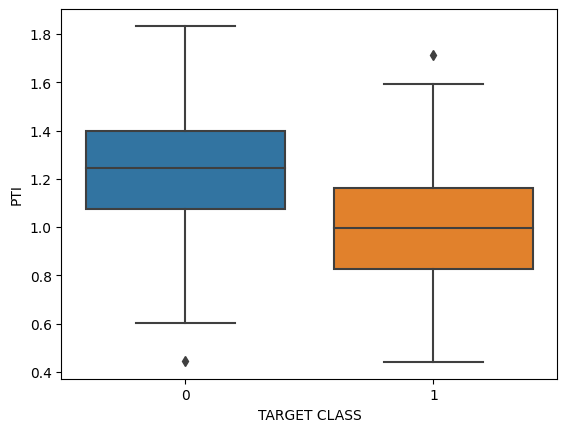

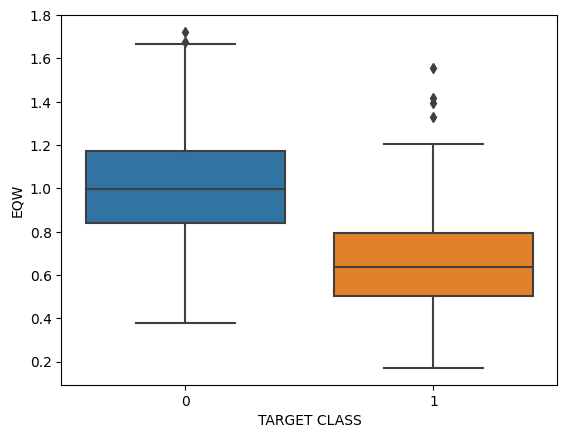

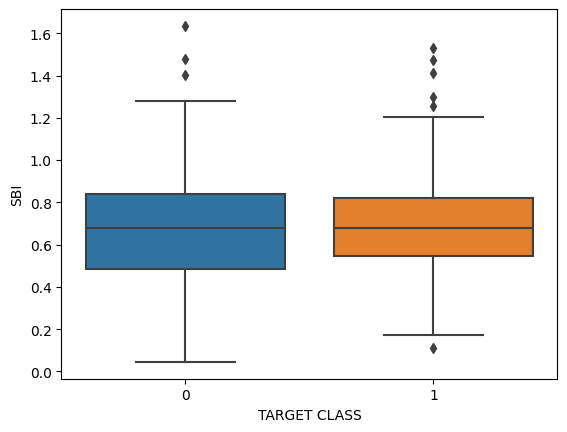

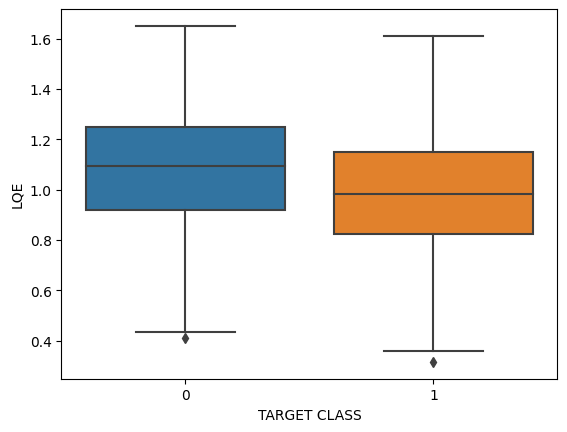

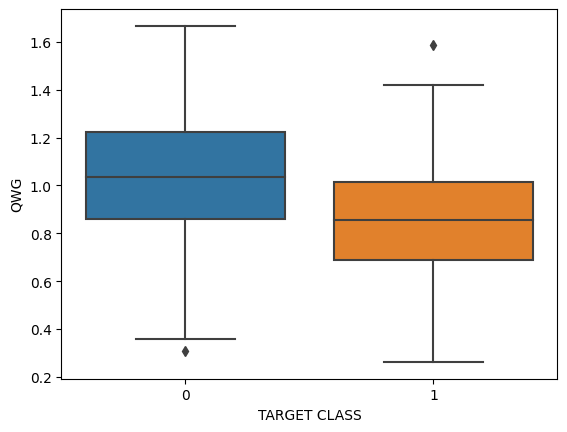

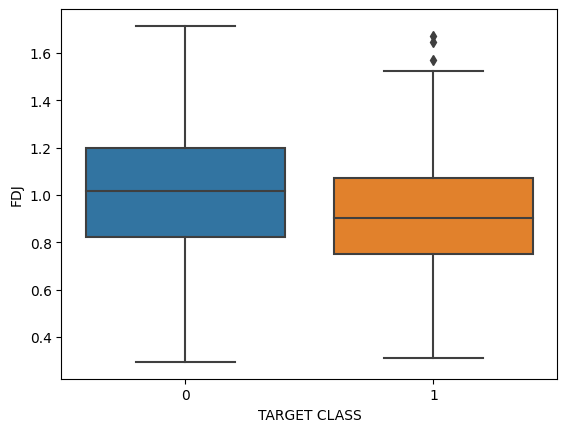

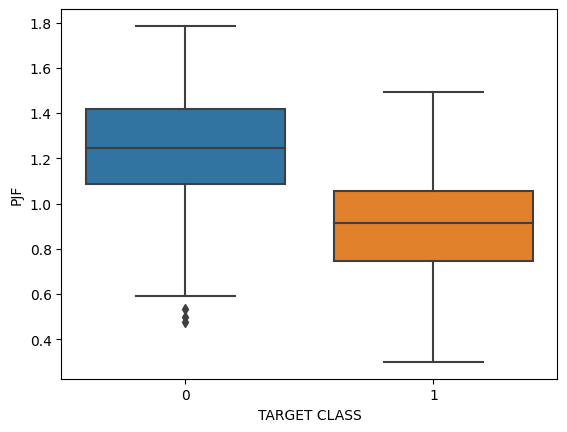

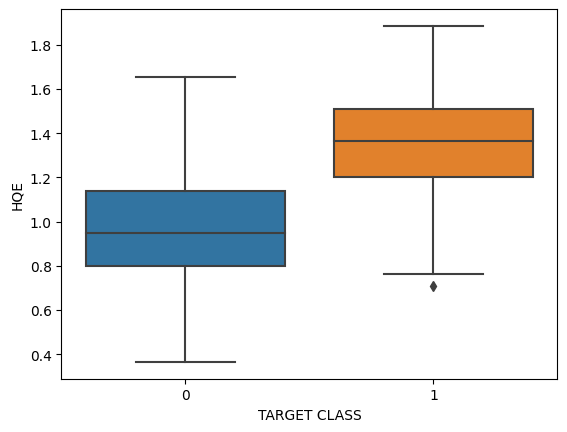

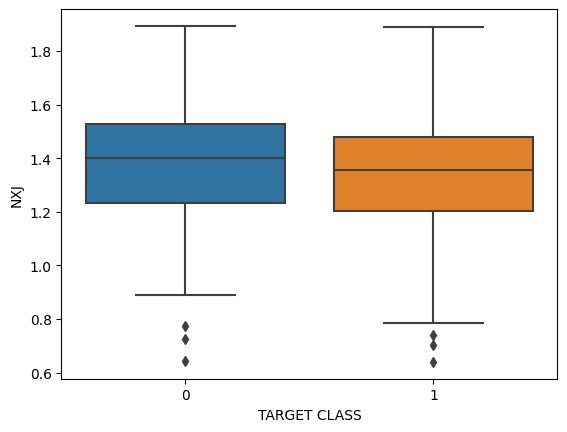

In [ ]:
# your code starts here
mask = (df['TARGET CLASS'] == 0) | (df['TARGET CLASS'] == 1)
new = df[mask]
for i in new.columns:
  if i != 'TARGET CLASS':
    sns.boxplot(y = new[i], x = new['TARGET CLASS'])
    plt.show()
# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

Text here

Box polt is used to find show the quartile ranges of the data in form of plots. It gives the idea about the median of the data and the 1st and 3rd quartiles.

From the above boxplot, we can conclude that the median of both the states (0,1) of the TARGET CLASS, are approximately the same for features SBI and NXJ which indicates an even distribution. The median of state 1 is greater for HQE and WTT and median of state 0 is greater for the rest of the features.

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [ ]:
# your code starts here
col = ['WTT',	'PTI',	'EQW',	'SBI',	'LQE',	'QWG', 'FDJ',	'PJF',	'HQE',	'NXJ']
scaler.fit(df[col])
new1 = scaler.transform(df[col])
#your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
# your code starts here
df_feat = pd.DataFrame(new1, columns = col)
df_feat.head()
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [ ]:
# Your code starts here.
X = df_feat
y = df['TARGET CLASS']
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [ ]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# Your code starts here.
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
report
# Your code ends here

'              precision    recall  f1-score   support\n\n           0       0.92      0.94      0.93       142\n           1       0.95      0.93      0.94       158\n\n    accuracy                           0.94       300\n   macro avg       0.94      0.94      0.94       300\nweighted avg       0.94      0.94      0.94       300\n'

Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
# Your code starts here.
acc = round(np.mean(y_test == pred), 3)
acc
# Your code ends here

0.937

Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
acc1 = []
# Your code starts here.
for n in range(1,61):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  acc1.append(round(np.mean(y_test == pred), 3))
acc1
# Your code ends here

[0.937,
 0.917,
 0.943,
 0.943,
 0.943,
 0.943,
 0.937,
 0.943,
 0.943,
 0.95,
 0.95,
 0.953,
 0.953,
 0.953,
 0.953,
 0.953,
 0.953,
 0.95,
 0.947,
 0.947,
 0.95,
 0.943,
 0.943,
 0.947,
 0.94,
 0.943,
 0.947,
 0.947,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95]

**Plot a graph of K value vs Accuracy**

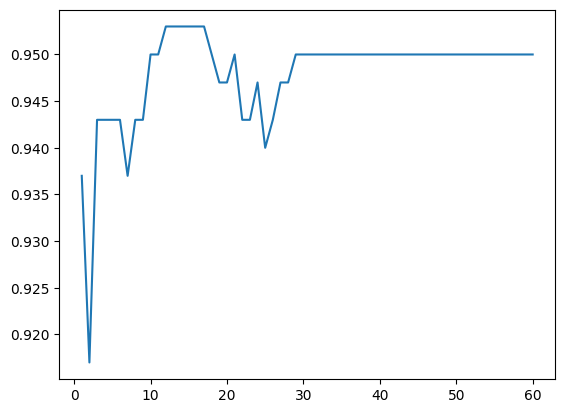

In [ ]:
# Your code starts here.
plt.plot(range(1,61), acc1)
plt.show()
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [ ]:
# Your code starts here.
n_acc_best = np.max(acc1)
n_neigh_best = np.argmax(acc1)+1
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 12
Corresponding highest accuracy: 0.953


In [ ]:
# Reasons:

#The best value of n_neighbours is 12 as it gives the best accuracy for the predictions which indicates that the model gave the most accurate predictions with the value.
#Also a higher number of n_neighbours can lead to underfitting of data while less n_neighbours could lead to overfitting. 12 strikes the balance between the two leading to the best fit.

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Reinforcement Learning**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **Reinforcement Learning**

**Introduction**

Machines learn like the kids - from scraped knees to sweet rewards. Reinceforcement learning is what looks something like the real artificial intellignce today. It is one of three basic machine learning paradigms, others being supervised learning and unsupervised learning. The latter two depend on data for predicting the output while RL does not rely on data but an environment where it aims to minimize the errors and not predict based on the dataset. It enables machines to make decisions by trial and error, adjusting their behavior based on the consequences of their actions. It has applications such as self driving vehicles, gaming and robotics.

**Basics**

At its core, RL is about agents and their interactions with environments. An agent, which could be a robot, a game-playing AI, or even a recommendation system, learns to make a sequence of decisions to maximize a cumulative reward. The agent takes actions in an environment, receives feedback (reward or penalty), and adjusts its strategy over time to achieve a specific goal.

1.   Agent: The learner or decision-maker that interacts with the environment.
2.   Environment: The external system or world with which the agent interacts.
3.   State (s): A representation of the environment at a given time step. It captures the critical information the agent needs to make decisions.
4.   Action (a): The choices or moves that the agent can make to influence the environment.
5.  Action (a): The choices or moves that the agent can make to influence the environment.
6.  Reward (r): A numerical value that reflects the immediate consequence of taking an action in a particular state. It guides the agent in learning what is good or bad.
7.  Policy (π): The strategy or mapping from states to actions that the agent follows to maximize its expected cumulative reward.

**Learning Process**

The magic of RL lies in learning a pattern that maximizes the cumulative reward over time. This is achieved by exploration, exploitation and experience. It is justt like a chlid learning how to walk, in the beginning, the agent explores the environment and takes random actions. It is rewarded and punished for the action, accordingly. As it starts gaining the knowledge, it takes better actions by exploiting the knowledge and uses theis experience for taking better actions in the future that would yield better rewards. Striking a balance between exploration and exploitation is a fundamental challenge in RL.

**Applications**

RL has a plethora of real world applications. Some of those are:
1.  Playing Games: RL algorithms have superhuman level of acheivement in games like chess
2.  Robotics: Robots can learn to perform tasks like walking, picking up objects, or navigating complex environments.
3.  Autonomous Systems: RL is used in self-driving cars, drones, and other autonomous vehicles to make real-time decisions.
4.  Finance: RL models can optimize trading strategies, portfolio management, and risk assessment.
5.  Healthcare: RL assists in personalized treatment plans, drug discovery, and optimizing healthcare operations.
6.  Recommendation Systems: Companies like Netflix and Amazon employ RL for personalized content and product recommendations.
7.  Natural Language Processing: Chatbots and virtual assistants are powered by RL to improve conversational interactions.

**Challenges and Upcoming Advancements**

RL has come a long way, but there are still significant challenges in its wake. The need for large amounts of data, high computational requirements, and the issue of ethical considerations in some applications are some of the hurdles to overcome. Researchers are actively working on addressing these challenges and exploring exciting directions like multi-agent RL, continual learning, and more.

**Conclusion**

Reinforcement learning has made significant strides, making machines learn from their own mistakes. Its ability to handle complex, dynamic, and uncertain environments makes it a powerful tool in AI. The journey into Reinforcement Learning is far from over, and the future promises exciting discoveries and innovations, with machines becoming increasingly adept at learning from their mistakes and making intelligent decisions.




# **End of Task**

> ©DJS Synapse 2023 - 2024

